In [1]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
import math

In [2]:
def sigmoid(x,y,b):
    y=1.0/(1.0+sp.exp(-(x+y+b)))
    return y

In [3]:
w1,w2,w3=sp.symbols('w1 w2 w3')
b1,b2= sp.symbols('b1 b2')
x,y=sp.symbols('x y')

In [4]:
def u(x,y):
    a1=sigmoid(w1*x,w2*y,b1)
    N=a1*w3+b2
    
    A=(1.0-x)*y**3+x*(1.0+y**3)*sp.exp(-1.0)
    B=(1.0-y)*x*(sp.exp(-x)-sp.exp(-1.0))+y*(sp.exp(-x)*(x+1.0)-(1.0-x+2.0*x*sp.exp(-1.0)))
    return A+B+x*(1.0-x)*y*(1.0-y)*N

In [5]:
# partial differential equation
# d^2u/dx^2 + d^2u/dy^2 = exp(-x)(x-2+y^3+6y) 

#Boundary condition
# u(0,y) = y^3
# u(1,y) = (1+y^3)*exp(-1)
# u(x,0) = x*exp(-x)
# u(x,1) = (x+1)*exp(-x)

In [6]:
U=u(x,y)
#2nd order derivative
d2u_dx2=U.diff(x,2)
d2u_dy2=U.diff(y,2)

#Boundary
u_x0=u(0,y)
u_x1=u(1,y)
u_y0=u(x,0)
u_y1=u(x,1)

In [7]:
#Loss Function
#L = (d2u_dx2+d2u_dy2-sp.exp(-x)*(x-2.0+y**3+6.0*y))**2+(u_x0-y**3)**2+(u_x1-(1.0+y**3)*sp.exp(-1.0))**2+(u_y0-x*sp.exp(-x))**2+(u_y1-(x+1.0)*sp.exp(-x))**2
L=(d2u_dx2+d2u_dy2-sp.exp(-x)*(x-2.0+y**3+6.0*y))**2
#Gradient
gw1,gw2,gw3=L.diff(w1),L.diff(w2),L.diff(w3)

gb1,gb2=L.diff(b1),L.diff(b2)

In [8]:
def Loss(W1,W2,W3,B1,B2,X,Y):
    return L.subs([(w1,W1),(w2,W2),(w3,W3),(b1,B1),(b2,B2),(x,X),(y,Y)])

In [9]:
def LW1(W1,W2,W3,B1,B2,X,Y):
    return gw1.subs([(w1,W1),(w2,W2),(w3,W3),(b1,B1),(b2,B2),(x,X),(y,Y)])

def LW2(W1,W2,W3,B1,B2,X,Y):
    return gw2.subs([(w1,W1),(w2,W2),(w3,W3),(b1,B1),(b2,B2),(x,X),(y,Y)])

def LW3(W1,W2,W3,B1,B2,X,Y):
    return gw3.subs([(w1,W1),(w2,W2),(w3,W3),(b1,B1),(b2,B2),(x,X),(y,Y)])

def LB1(W1,W2,W3,B1,B2,X,Y):
    return gb1.subs([(w1,W1),(w2,W2),(w3,W3),(b1,B1),(b2,B2),(x,X),(y,Y)])

def LB2(W1,W2,W3,B1,B2,X,Y):
    return gb2.subs([(w1,W1),(w2,W2),(w3,W3),(b1,B1),(b2,B2),(x,X),(y,Y)])


In [10]:
#Initialization
#Weight
import random
random.seed(1)
W1=random.random()
W2=random.random()
W3=random.random()

#Bias
B1=random.random()
B2=random.random()


In [11]:
#Training Set
X_value=np.linspace(0,1,10)
Y_value=np.linspace(0,1,10)

n1=X_value.shape[0]
n2=Y_value.shape[0]
n=n1*n2

In [12]:
# Number of Epoch
epoch=50
#learning rate
l_rate = 0.1
Lss=[]
for i in range(epoch):
    S1,S2,S3=0,0,0
    Bi1,Bi2=0,0
    Ls=0.0
    for X in X_value:
        for Y in Y_value:
            Ls+=Loss(W1,W2,W3,B1,B2,X,Y)
            
            S1+= LW1(W1,W2,W3,B1,B2,X,Y)
            S2+= LW2(W1,W2,W3,B1,B2,X,Y)
            S3+= LW3(W1,W2,W3,B1,B2,X,Y)
            
            Bi1+= LB1(W1,W2,W3,B1,B2,X,Y)
            Bi2+= LB2(W1,W2,W3,B1,B2,X,Y)
        
    
    W1-=l_rate*(S1/n)
    W2-=l_rate*(S2/n)
    W3-=l_rate*(S3/n)

    B1-=l_rate*(Bi1/n)
    B2-=l_rate*(Bi2/n)
    
    a=Ls/n
    Lss.append(a)
    if i>=1:
        if abs(Lss[-2]-Lss[-1]) <0.001:
            break

In [13]:
print('Weights:',(W1,W2,W3))
print('Bias:',(B1,B2))

Weights: (0.100117108363215, 0.835623668247043, 0.564883550462209)
Bias: (0.206146353119067, 0.177866882546691)


In [14]:

def NN_U(xi,yi):
    return U.subs([(w1,W1),(w2,W2),(w3,W3),(b1,B1),(b2,B2),(x,xi),(y,yi)])

def act_U(xi,yi):
    return np.exp(-xi)*(xi+yi**3)

#Test Set
X_test=np.linspace(0,1,17)
Y_test=np.linspace(0,1,17)

N1=X_test.shape[0]
N2=Y_test.shape[0]
N=N1*N2

er=0
U_NN=[]
U_act=[]

for xi in X_test:
    for yi in Y_test:
        U_NN.append(NN_U(xi,yi))
        U_act.append(act_U(xi,yi))
        er+=(NN_U(xi,yi)-act_U(xi,yi))**2
        
print('Mean square error:','%0.7f'%(er/N))

Mean square error: 0.0000097


In [15]:
a=sp.symbols('a',real=True)
b=sp.symbols('b',real=True)
print(U.subs([(w1,W1),(w2,W2),(w3,W3),(b1,B1),(b2,B2),(x,a),(y,b)]))

a*b*(0.177866882546691 + 0.564883550462209/(0.813713977989223*exp(-0.100117108363215*a - 0.835623668247043*b) + 1.0))*(1.0 - a)*(1.0 - b) + a*(-0.367879441171442 + exp(-a))*(1.0 - b) + 0.367879441171442*a*(b**3 + 1.0) + b**3*(1.0 - a) + b*(0.264241117657115*a + (a + 1.0)*exp(-a) - 1.0)


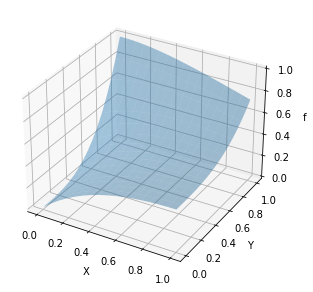

In [16]:
from mpl_toolkits import mplot3d
from matplotlib import cm

a = np.linspace(0, 1, 17)
b = np.linspace(0, 1, 17)

X, Y = np.meshgrid(a, b)
Z = act_U(X, Y)
fig = plt.figure(figsize = (6,5))
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y , Z,rstride = 1 ,cstride = 1,alpha = 0.4)
cset = ax.contour(X, Y, Z, zdir='z', offset=-1200,cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-10,cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=10,cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f');

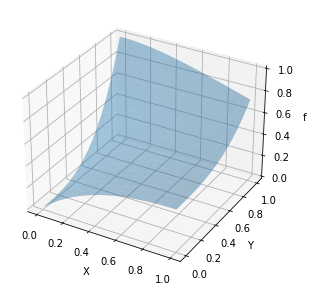

In [17]:
def f(a, b):
    return a*b*(0.177866882546691 + 0.564883550462209/(0.813713977989223*np.exp(-0.100117108363215*a - 0.835623668247043*b) + 1.0))*(1.0 - a)*(1.0 - b) + a*(-0.367879441171442 + np.exp(-a))*(1.0 - b) + 0.367879441171442*a*(b**3 + 1.0) + b**3*(1.0 - a) + b*(0.264241117657115*a + (a + 1.0)*np.exp(-a) - 1.0)


a = np.linspace(0, 1.0, 17)
b = np.linspace(0, 1.0, 17)

X, Y = np.meshgrid(a, b)
Z = f(X, Y)
fig = plt.figure(figsize = (6,5))
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y , Z,rstride = 1 ,cstride = 1,alpha = 0.4)
cset = ax.contour(X, Y, Z, zdir='z', offset=-1200,cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-10,cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=10,cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f');

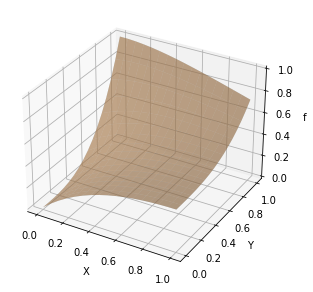

In [18]:


a = np.linspace(0, 1, 17)
b = np.linspace(0, 1, 17)

X, Y = np.meshgrid(a, b)
Z = f(X, Y)
W = act_U(X, Y)

fig = plt.figure(figsize = (6,5))
ax = fig.gca(projection='3d')
ax.plot_surface(X,Y , Z,rstride = 1 ,cstride = 1,alpha = 0.4)
cset = ax.contour(X, Y, Z, zdir='z', offset=-1200,cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='x', offset=-10,cmap=cm.coolwarm)
cset = ax.contour(X, Y, Z, zdir='y', offset=10,cmap=cm.coolwarm)
ax.plot_surface(X,Y , W,rstride = 1 ,cstride = 1,alpha = 0.4)
cset = ax.contour(X, Y, W, zdir='W', offset=-1200,cmap=cm.coolwarm)
cset = ax.contour(X, Y, W, zdir='x', offset=-10,cmap=cm.coolwarm)
cset = ax.contour(X, Y, W, zdir='y', offset=10,cmap=cm.coolwarm)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('f');
